# Introduction

Estimated daily visits to the Prophet's Mosque tens of thousands of people gather to pray and visit the tomb of the Prophet and peace be upon him. Early anticipation of visits can help to be well prepared, take precautions, and be more organized. The project aims to predict the number of visits, the age of visitors and the care they need.

# Data

The dataset is taken from the Ministry of Hajj and Umrah in Madinah, which is the number of people who visited the Prophet’s Mosque to pray and visit the Prophet Muhammad.

# ** Data Preparation & Cleaning **


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

%matplotlib inline

from sklearn.model_selection import train_test_split

In [4]:
heart= pd.read_csv('Dataset Ministry of Hajj and Umrah Medina.csv')
heart.head(10)

,NO,RESERVATION_NO,Permit_No,DATE,TIME_FROM,TIME_TO,SEX,AGE,Assembly_POINT,Permit_KIND,Care
0,1,47851116,94938233,06/09/2021,6:00 PM,9:00 PM,MALE,55,Bab Al Salam Square,Visiting the Prophet Muhammed,1
1,2,47851116,94938234,06/09/2021,6:00 PM,9:00 PM,FEMALE,22,Bab Al Salam Square,Visiting the Prophet Muhammed,0
2,3,47851116,94938235,06/09/2021,6:00 PM,9:00 PM,FEMALE,25,Bab Al Salam Square,Visiting the Prophet Muhammed,0
3,4,47851117,94938236,06/09/2021,6:00 PM,9:00 PM,FEMALE,25,Bab Al Salam Square,Visiting the Prophet Muhammed,0
4,5,47851118,94938237,06/09/2021,6:00 PM,9:00 PM,FEMALE,32,Bab Al Salam Square,Visiting the Prophet Muhammed,0
5,6,47851119,94938238,06/09/2021,6:00 PM,9:00 PM,MALE,55,Bab Al Salam Square,Visiting the Prophet Muhammed,1
6,7,47851120,94938239,06/09/2021,6:00 PM,9:00 PM,MALE,22,Bab Al Salam Square,Visiting the Prophet Muhammed,0
7,8,47851121,94938240,06/09/2021,6:00 PM,9:00 PM,MALE,40,Bab Al Salam Square,Visiting the Prophet Muhammed,0
8,9,47851122,94938241,06/09/2021,6:00 PM,9:00 PM,MALE,46,Bab Al Salam Square,Visiting the Prophet Muhammed,1
9,10,47851123,94938242,06/09/2021,6:00 PM,9:00 PM,MALE,44,Bab Al Salam Square,Visiting the Prophet Muhammed,1


In [5]:
heart.drop(['NO','RESERVATION_NO'] , axis='columns', inplace=True)#uncessry
heart.head()

,Permit_No,DATE,TIME_FROM,TIME_TO,SEX,AGE,Assembly_POINT,Permit_KIND,Care
0,94938233,06/09/2021,6:00 PM,9:00 PM,MALE,55,Bab Al Salam Square,Visiting the Prophet Muhammed,1
1,94938234,06/09/2021,6:00 PM,9:00 PM,FEMALE,22,Bab Al Salam Square,Visiting the Prophet Muhammed,0
2,94938235,06/09/2021,6:00 PM,9:00 PM,FEMALE,25,Bab Al Salam Square,Visiting the Prophet Muhammed,0
3,94938236,06/09/2021,6:00 PM,9:00 PM,FEMALE,25,Bab Al Salam Square,Visiting the Prophet Muhammed,0
4,94938237,06/09/2021,6:00 PM,9:00 PM,FEMALE,32,Bab Al Salam Square,Visiting the Prophet Muhammed,0


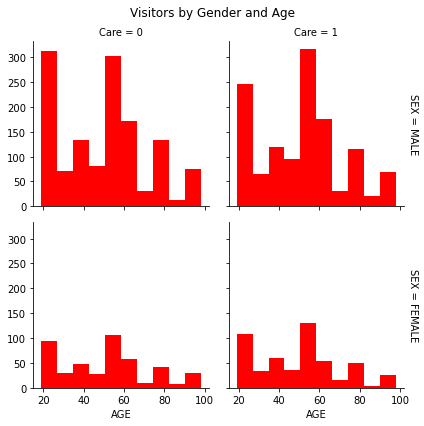

In [6]:
g = sns.FacetGrid(heart, col='Care', row='SEX', margin_titles=True)
g.map(plt.hist, 'AGE', color='red')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Visitors by Gender and Age');

In [38]:
df.Care.value_counts()#unbalanced !!

0    1773
1    1771
Name: Care, dtype: int64

In [39]:
h2 = pd.get_dummies(heart,
                   columns = ['SEX', 'Care'])


### Statistical Summary:

In [40]:
df.describe()

,NO,RESERVATION_NO,Permit_No,AGE,Care,log2_value1
count,3544.000000,3.544000e+03,3.544000e+03,3544.000000,3544.000000,3544.000000
mean,1772.500000,3.119180e+08,9.494000e+07,50.860045,0.499718,27.548917
std,1023.209004,2.097795e+08,1.023209e+03,21.052416,0.500070,1.618113
min,1.000000,4.785112e+07,9.493823e+07,19.000000,0.000000,25.512049
25%,886.750000,4.785196e+07,9.493912e+07,28.000000,0.000000,25.512075
50%,1772.500000,4.785235e+08,9.494000e+07,55.000000,0.000000,28.834014
75%,2658.250000,4.785243e+08,9.494089e+07,65.000000,1.000000,28.834017
max,3544.000000,4.785249e+08,9.494178e+07,98.000000,1.000000,28.834019


<AxesSubplot:>

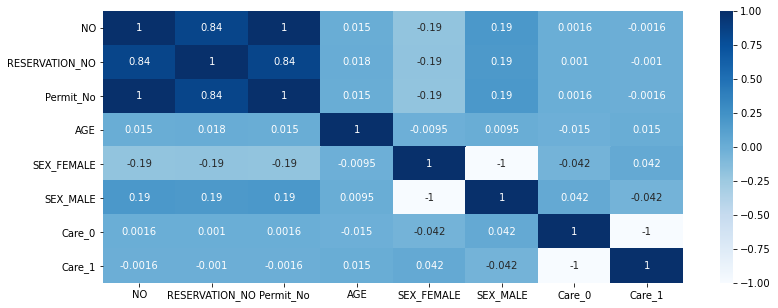

In [17]:
plt.figure(figsize=[13,5])
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)


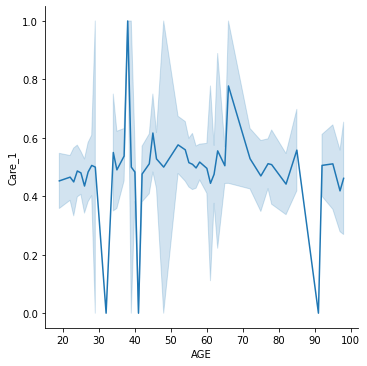

In [48]:

g = sns.relplot(x="AGE", y="Care_1", kind="line", data=df)


In [41]:
mask = (df['AGE']< 35) & (df['Care_1'] > 0)
new=df[mask]
new['AGE'].value_counts()

22    88
25    85
24    55
19    48
26    47
28    44
27    43
23    31
34    11
29     1
Name: AGE, dtype: int64

#  ** Modeling & Testing  **

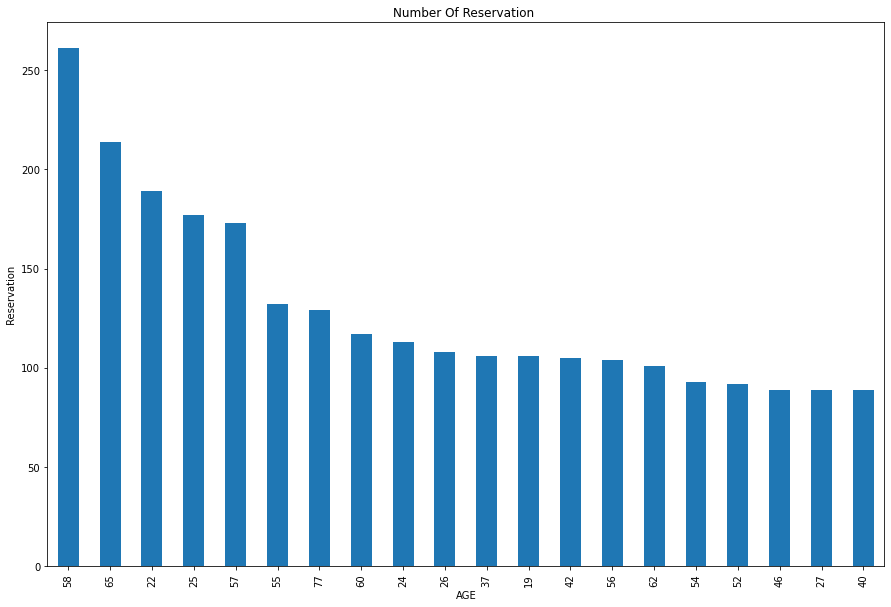

In [29]:
plt.figure(figsize=(15,10))
df['AGE'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Number Of Reservation ')
plt.xlabel('AGE')
plt.ylabel(' Reservation ');

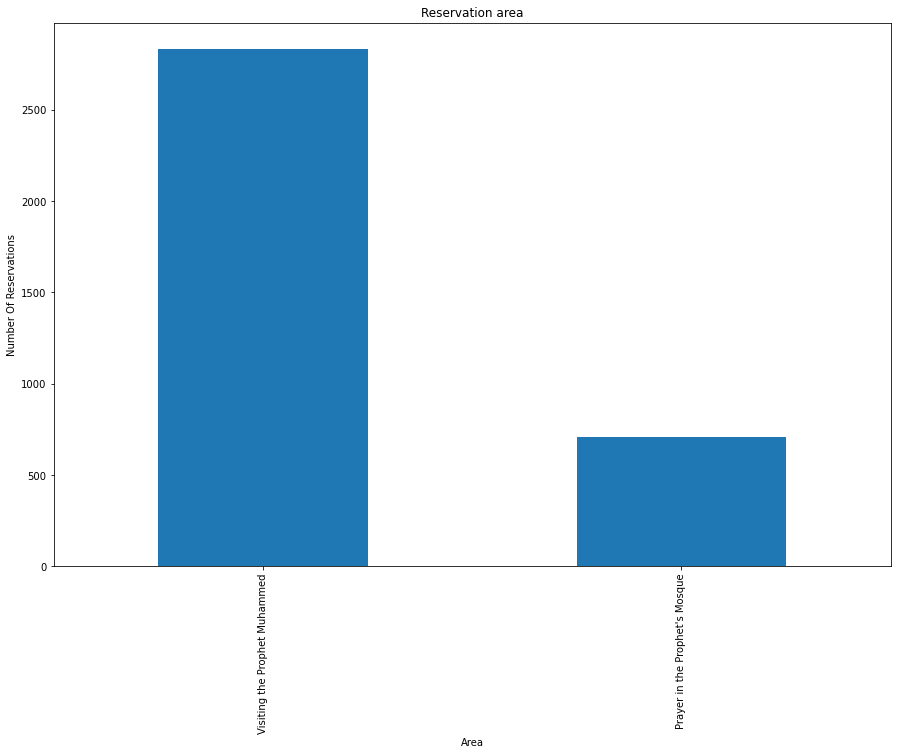

In [34]:
plt.figure(figsize=(15,10))
df['Permit_KIND'].value_counts().nlargest(12).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Reservation area')
plt.xlabel('Area')
plt.ylabel('Number Of Reservations');


In [41]:
df.shape

(3544, 12)

In [42]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversampling=SMOTE()
X,y=oversampling.fit_resample(df.drop(['TenYearCHD'], axis = 1),df['TenYearCHD'])#

In [ ]:
X.shape

In [ ]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


std_scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2, random_state=42)
X_train_scaled = std_scale.fit_transform(X_train)#df.drop(['TenYearCHD'], axis = 1)
lm = LogisticRegression(C=1000)

lm.fit(X_train_scaled ,y_train)
lm.score(X_train_scaled ,y_train)
X_test_scaled = std_scale.fit_transform(X_test)
y_pre=lm.predict(X_test_scaled)
print(metrics.recall_score(y_test,y_pre))
print(metrics.f1_score(y_test,y_pre))